In [9]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
import os

%matplotlib inline

In [18]:
# Get the data for the stock ^IBEX
ibex35_list = ["^IBEX","ANA.MC","ACX.MC","ACS.MC","AENA.MC","AMS.MC","MTS.MC","SAB.MC","BKT.MC","BBVA.MC","CABK.MC","CLNX.MC","COL.MC","ANE.MC","ENG.MC","ELE.MC","FER.MC","FDR.MC","GRF.MC","IAG.MC","IBE.MC","ITX.MC","IDR.MC","LOG.MC","MAP.MC","MEL.MC","MRL.MC","NTGY.MC","RED.MC","REP.MC","ROVI.MC","SCYR.MC","SAN.MC","SLR.MC","TEF.MC","UNI.MC"]

for stock in ibex35_list:
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

num_files = len(os.listdir("../input")) 
print(f"{num_files} files downloaded")

36 files downloaded


In [10]:
# Check DataFrame
ibex35 = pd.read_csv("../input/^IBEX.csv",index_col="Date",parse_dates=True)
ibex35.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [11]:
# Check DataFrame tail
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-16,9244.799805,9306.000000,9174.200195,9287.099609,9287.099609,105248200
2023-10-17,9268.400391,9323.400391,9219.500000,9298.500000,9298.500000,79826100
2023-10-18,9278.200195,9305.700195,9202.500000,9212.700195,9212.700195,108127200
2023-10-19,9176.799805,9189.700195,9101.099609,9146.799805,9146.799805,143366500
2023-10-20,9067.099609,9098.299805,9021.799805,9029.099609,9029.099609,230887100
2023-10-23,9028.700195,9037.000000,8920.700195,8995.500000,8995.500000,139157300
2023-10-24,9004.200195,9029.000000,8950.799805,8975.799805,8975.799805,162189000
2023-10-25,8961.799805,9000.799805,8898.000000,8984.799805,8984.799805,149177700
2023-10-26,8926.900391,8978.500000,8879.299805,8962.799805,8962.799805,164229500


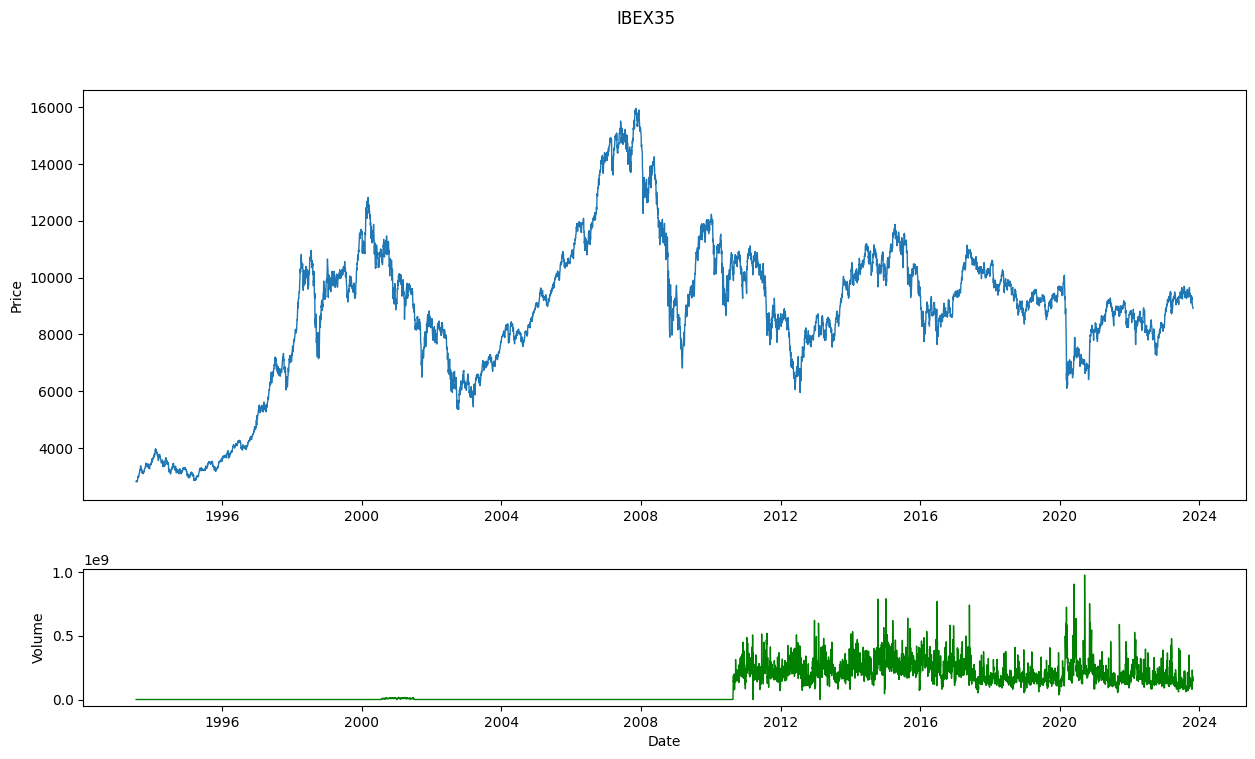

In [12]:
# Plot the adjusted close price of the ^IBEX
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8))

fig.suptitle("IBEX35")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'],linewidth=1)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(ibex35['Volume'],linewidth=1,color='g')

plt.show()

In [13]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
ibex35['MMA20'] = ibex35['Adj Close'].loc['2023'].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=ibex35["Adj Close"].loc['2023'], window=20, window_dev=2)

# Bollinger Bands
ibex35['BB_Upper'] = indicator_bb.bollinger_hband()
ibex35['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=ibex35["Adj Close"].loc['2023'], window=14)

# RSI
ibex35['RSI'] = indicator_rsi.rsi()

# Daily Return
ibex35['Daily_Return'] = daily_return(ibex35["Adj Close"].loc['2023'])

# Cummulative Return
ibex35['Cummulative_Return'] = cumulative_return(ibex35["Adj Close"].loc['2023'])

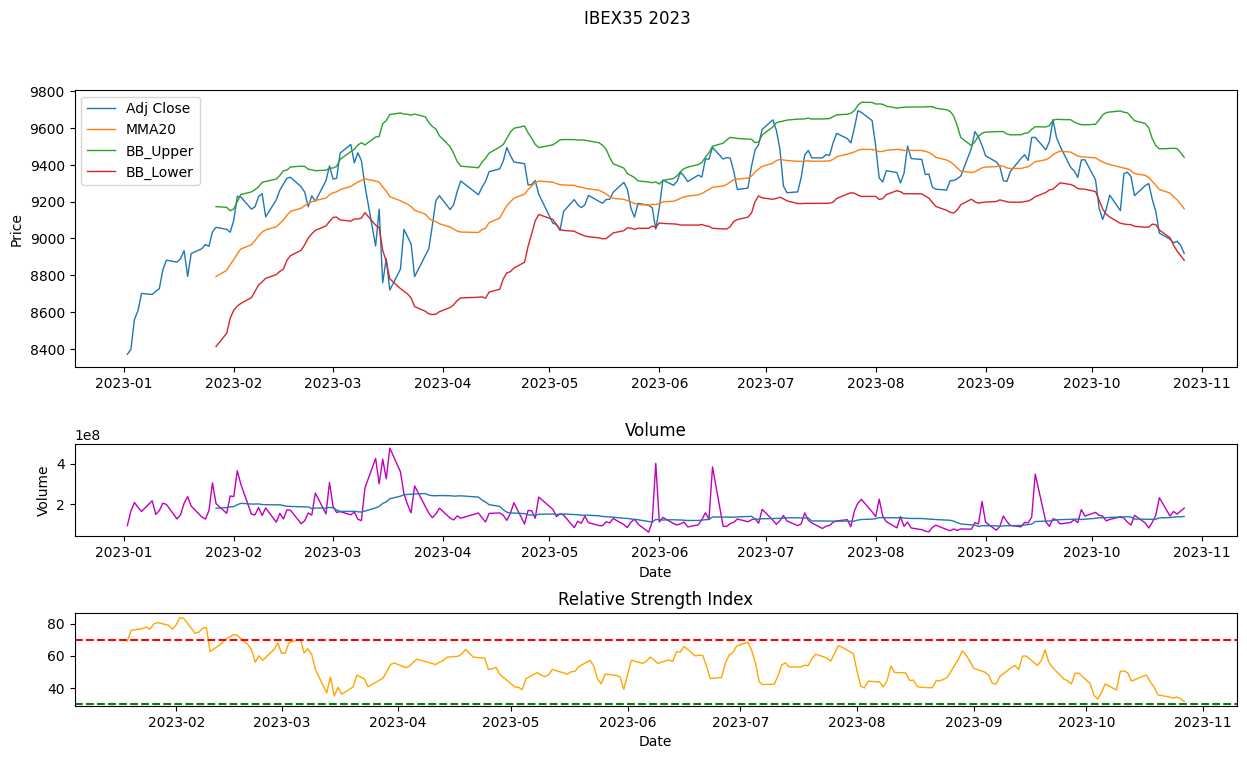

In [14]:
# Plot the adjusted close price of the ^IBEX for 2023
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8))

# Graph 0
fig.suptitle("IBEX35 2023")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'].loc['2023'],linewidth=1)
axs[0].plot(ibex35['MMA20'],linewidth=1) 
axs[0].plot(ibex35['BB_Upper'],linewidth=1)
axs[0].plot(ibex35['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(ibex35['Volume'].loc['2023'],linewidth=1,color='m')
axs[1].plot(ibex35['Volume'].loc['2023'].rolling(20).mean(),linewidth=1) #Volume 20 MMA

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_xlabel("Date")
axs[2].plot(ibex35['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [15]:
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return,Cummulative_Return
Date,,,,,,,,,,,,
2023-10-16,9244.799805,9306.000000,9174.200195,9287.099609,9287.099609,105248200,9343.210059,9625.370173,9061.049944,47.251844,0.587023,10.960959
2023-10-17,9268.400391,9323.400391,9219.500000,9298.500000,9298.500000,79826100,9331.775049,9601.442652,9062.107446,47.909151,0.122755,11.097169
2023-10-18,9278.200195,9305.700195,9202.500000,9212.700195,9212.700195,108127200,9310.120068,9542.409366,9077.830770,43.514297,-0.922727,10.072045
2023-10-19,9176.799805,9189.700195,9101.099609,9146.799805,9146.799805,143366500,9290.015039,9505.126551,9074.903527,40.445405,-0.715321,9.284677
2023-10-20,9067.099609,9098.299805,9021.799805,9029.099609,9029.099609,230887100,9266.370020,9486.970251,9045.769788,35.614286,-1.286791,7.878411
2023-10-23,9028.700195,9037.000000,8920.700195,8995.500000,8995.500000,139157300,9246.845020,9489.644127,9004.045912,34.352800,-0.372126,7.476968
2023-10-24,9004.200195,9029.000000,8950.799805,8975.799805,8975.799805,162189000,9227.289990,9490.410216,8964.169764,33.601289,-0.219001,7.241593
2023-10-25,8961.799805,9000.799805,8898.000000,8984.799805,8984.799805,149177700,9209.934961,9488.501104,8931.368818,34.308322,0.100270,7.349124
2023-10-26,8926.900391,8978.500000,8879.299805,8962.799805,8962.799805,164229500,9186.734961,9466.476308,8906.993614,33.372834,-0.244858,7.086271


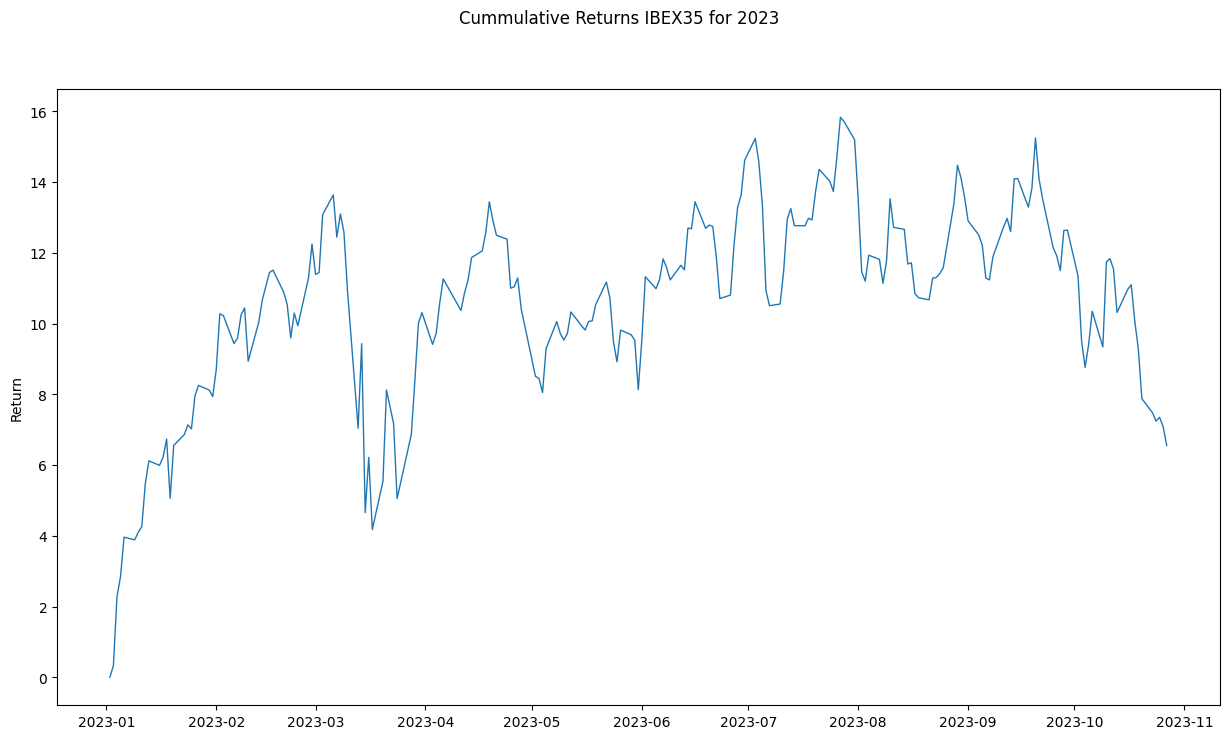

In [25]:
# Plot Cummulative Returns ^IBEX for 2023
fig, axs = plt.subplots(figsize=(15, 8))

# Graph 0
fig.suptitle("Cummulative Returns IBEX35 for 2023")
axs.set_ylabel('Return')
axs.plot(ibex35['Cummulative_Return'].loc['2023'],linewidth=1)

plt.show()